In [1]:
import sys
sys.path.append('../..')

import copy
import re
import csv
import codecs
from random import shuffle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import load_six_emotions, load_3_emotions, generate_corpus, tokenizer
from unsupervised.emotional_lsa import EmotionalLSA

np.random.seed(12345)

%matplotlib inline

In [2]:
# Create a function called "chunks" with two arguments, l and n:
def chunks(l, n):
    # For item i in a range that is a length of l,
    for i in range(0, len(l), n):
        # Create an index range for l of n items:
        yield l[i:i+n]


print('Loading emotional words: ')
emotion_words = load_six_emotions('/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/emocoes')
emotion_words_n = load_3_emotions('/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/emocoes')
# emotion_words['NEUTRO'] = emotion_words_n['NEUTRO']

Loading emotional words: 


## Validação 1

Validaremos o algoritmo, adicionando o em uma das 6 emoções definidas + 1 neutro.

Utilizaremos uma base com aproximadamente 3000 frases diversas.

In [3]:
# with open('/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/frases.txt') as h:
with open('/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/frases_diversas.txt') as h:
    original_phrases = h.readlines()
# original_phrases = original_phrases[:100]
phrases = copy.deepcopy(original_phrases)
phrases = generate_corpus(phrases)
ldocs = [f'D{i}' for i in range(len(original_phrases))]

In [4]:
print('Starting EmotionalLSA model...')
model = EmotionalLSA(use_tfidf=True, debug=True)
print('fit and transform...')
predicted = model.fit_transform(phrases, copy.deepcopy(emotion_words))

Starting EmotionalLSA model...
fit and transform...
using Tf-Idf...
Actual number of features: 4326
--- 0.09277749061584473 seconds ---
Calculating SVD...
--- 0.581183910369873 seconds ---
Processing emotional state...
--- 0.07003283500671387 seconds ---
Generating emotional state from lexicon... this may take a while...
--- 0.5923843383789062 seconds ---
Calculating final emotional matrix...
--- 3.1174213886260986 seconds ---


In [5]:
df = pd.DataFrame(predicted[:len(original_phrases)], index=ldocs, columns=emotion_words.keys())

D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

D1 - "A religiao é o que impede o pobre de matar o rico.

D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

D4 - 30 de Janeiro de 1933 será lembrado como o dia em que o povo se tornou novamente o dono desta nação.

D5 - A adolescência é como uma casa em dia de mudanças: Uma desordem temporária.

D6 - A adversidade desperta em nós capacidades que, em circunstâncias favoráveis, teriam ficado adormecidas.

D7 - A adversidade põe à prova os espíritos.



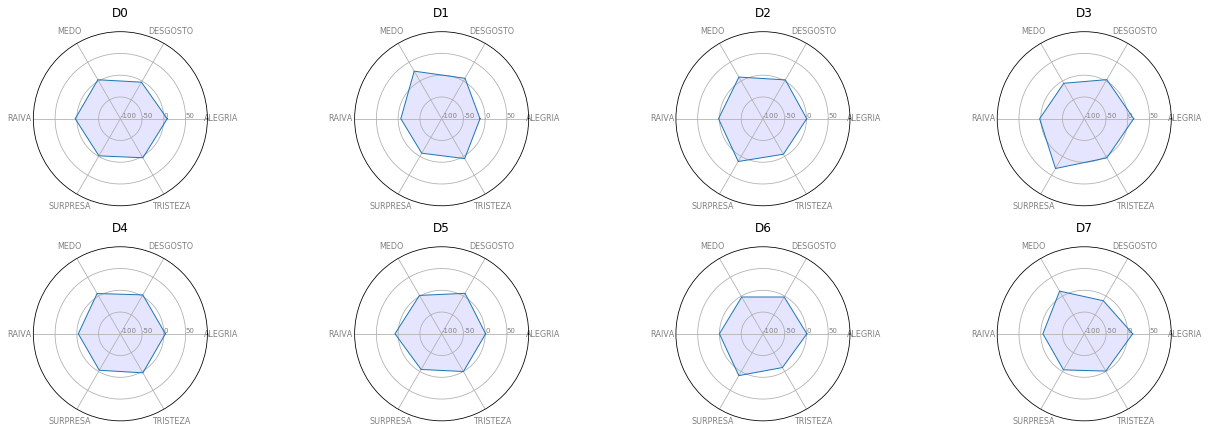

In [6]:
categories = list(df)
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(18, 12))
for m in range(8):
    idx = m + 1
    
    values = df.loc[f'D{m}'].values
    values = np.append(values, values[0])
    print(f'D{m} - {original_phrases[m]}')
    # Initialise the spider plot
    ax = plt.subplot(4, 4, idx, polar=True)
    # Title
    plt.title(f'D{m}')
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(range(-100, 100, 50), [f'{i}' for i in range(-100, 100, 50)], color="grey", size=7)
    plt.ylim(-100, 100)
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

plt.tight_layout()
plt.show()

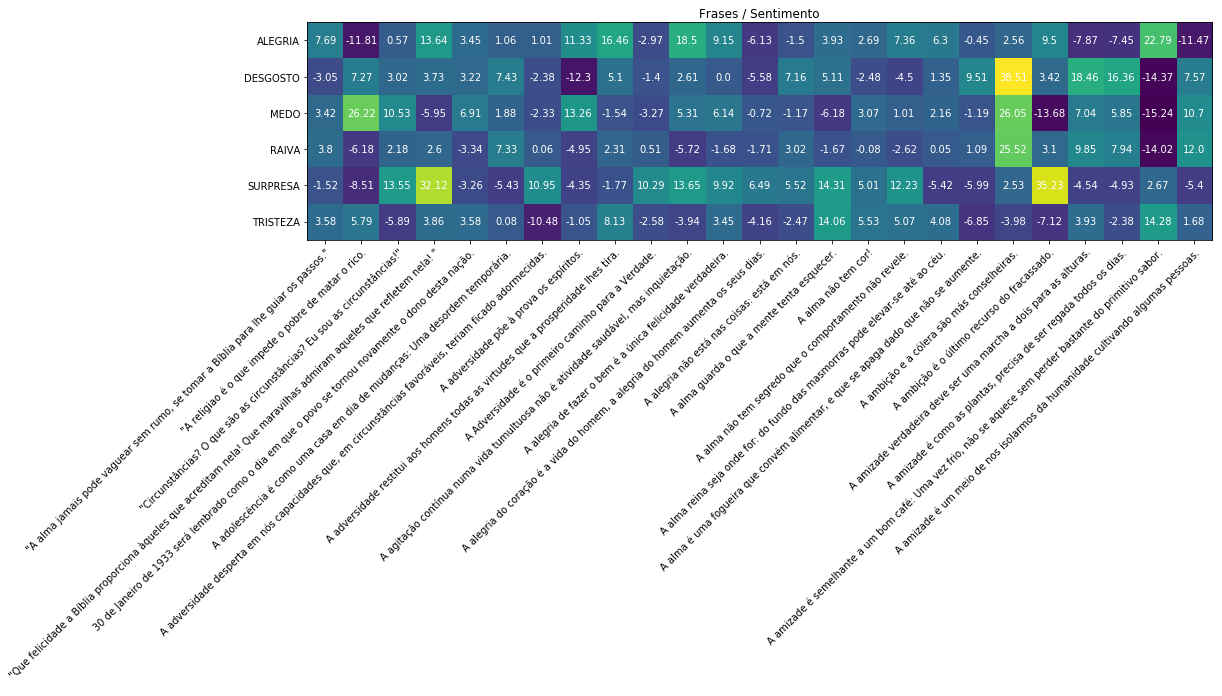

In [7]:
N = 25

categories = list(df)
k_phrases = original_phrases[:N] # [f'D{i}' for i in range(len(original_phrases[:N]))]
values = df[:N].values.T

fig, ax = plt.subplots(1, 1, figsize=(17, 17))
im = ax.imshow(values)

# We want to show all ticks...
ax.set_xticks(np.arange(len(k_phrases)))
ax.set_yticks(np.arange(len(categories)))
# ... and label them with the respective list entries
ax.set_xticklabels(k_phrases)
ax.set_yticklabels(categories)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for j in range(len(categories)):
    for i in range(len(k_phrases)):
        text = ax.text(i, j, values[j, i],
                       ha="center", va="center", color="w")

ax.set_title("Frases / Sentimento")
fig.tight_layout()
plt.show()

In [8]:
for i, frase in enumerate(original_phrases[:10]):
    print('-' * 20)
    print(f'D{i} - {frase}')
    print(df.loc[f'D{i}'])

--------------------
D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

ALEGRIA     7.69
DESGOSTO   -3.05
MEDO        3.42
RAIVA       3.80
SURPRESA   -1.52
TRISTEZA    3.58
Name: D0, dtype: float64
--------------------
D1 - "A religiao é o que impede o pobre de matar o rico.

ALEGRIA    -11.81
DESGOSTO     7.27
MEDO        26.22
RAIVA       -6.18
SURPRESA    -8.51
TRISTEZA     5.79
Name: D1, dtype: float64
--------------------
D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

ALEGRIA      0.57
DESGOSTO     3.02
MEDO        10.53
RAIVA        2.18
SURPRESA    13.55
TRISTEZA    -5.89
Name: D2, dtype: float64
--------------------
D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

ALEGRIA     13.64
DESGOSTO     3.73
MEDO        -5.95
RAIVA        2.60
SURPRESA    32.12
TRISTEZA     3.86
Name: D3, dtype: float64
--------------------
D4 - 30 de Janeiro d

## Validação 2

Utilizaremos os mesmos dados, entretanto agora categorizaremos as frases acima, nas categorias POSITIVO, NEGATIVO e NEUTRO.

In [9]:
print('Starting EmotionalLSA model...')
model = EmotionalLSA(use_tfidf=True, debug=True)
print('fit and transform...')
predicted = model.fit_transform(phrases, copy.deepcopy(emotion_words_n))
    
size = len(original_phrases)
df = pd.DataFrame(predicted, index=ldocs, columns=emotion_words_n.keys())

Starting EmotionalLSA model...
fit and transform...
using Tf-Idf...
Actual number of features: 4326
--- 0.08396601676940918 seconds ---
Calculating SVD...
--- 0.4942135810852051 seconds ---
Processing emotional state...
--- 0.7970330715179443 seconds ---
Generating emotional state from lexicon... this may take a while...
--- 3.7705514430999756 seconds ---
Calculating final emotional matrix...
--- 1.6293847560882568 seconds ---


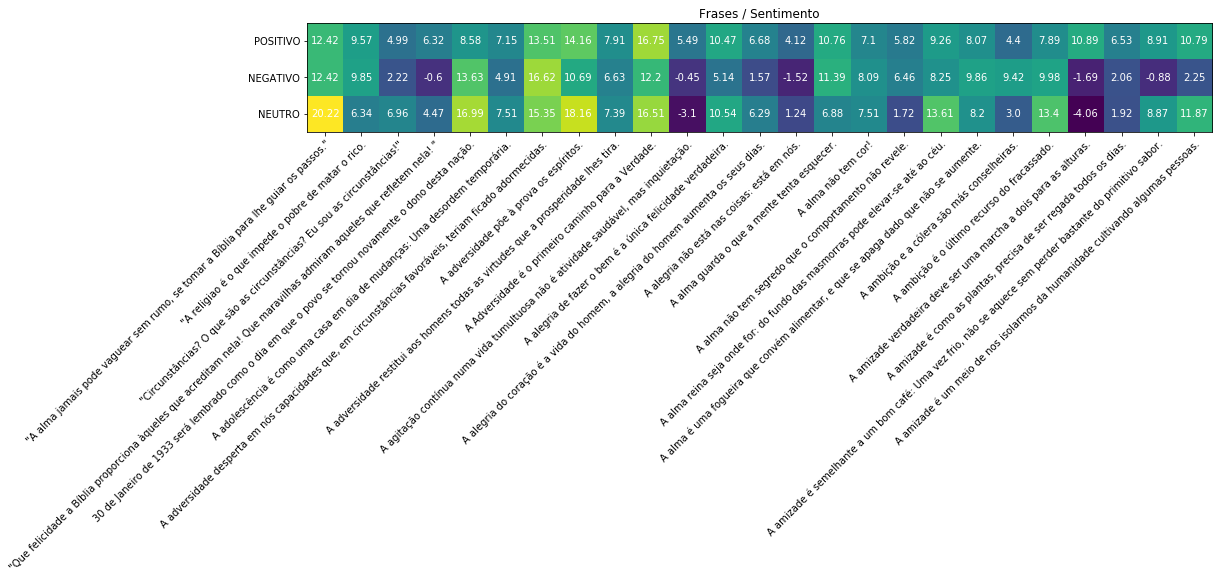

In [10]:
N = 25

categories = list(df)
k_phrases = original_phrases[:N] # [f'D{i}' for i in range(len(original_phrases[:N]))]
values = df[:N].values.T

fig, ax = plt.subplots(1, 1, figsize=(17, 17))
im = ax.imshow(values)

# We want to show all ticks...
ax.set_xticks(np.arange(len(k_phrases)))
ax.set_yticks(np.arange(len(categories)))
# ... and label them with the respective list entries
ax.set_xticklabels(k_phrases)
ax.set_yticklabels(categories)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for j in range(len(categories)):
    for i in range(len(k_phrases)):
        text = ax.text(i, j, values[j, i],
                       ha="center", va="center", color="w")

ax.set_title("Frases / Sentimento")
fig.tight_layout()
plt.show()

D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

D1 - "A religiao é o que impede o pobre de matar o rico.

D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

D4 - 30 de Janeiro de 1933 será lembrado como o dia em que o povo se tornou novamente o dono desta nação.

D5 - A adolescência é como uma casa em dia de mudanças: Uma desordem temporária.

D6 - A adversidade desperta em nós capacidades que, em circunstâncias favoráveis, teriam ficado adormecidas.

D7 - A adversidade põe à prova os espíritos.

D8 - A adversidade restitui aos homens todas as virtudes que a prosperidade lhes tira.

D9 - A Adversidade é o primeiro caminho para a Verdade.

D10 - A agitação contínua numa vida tumultuosa não é atividade saudável, mas inquietação.

D11 - A alegria de fazer o bem é a única felicidade verdadeira.

D12 -

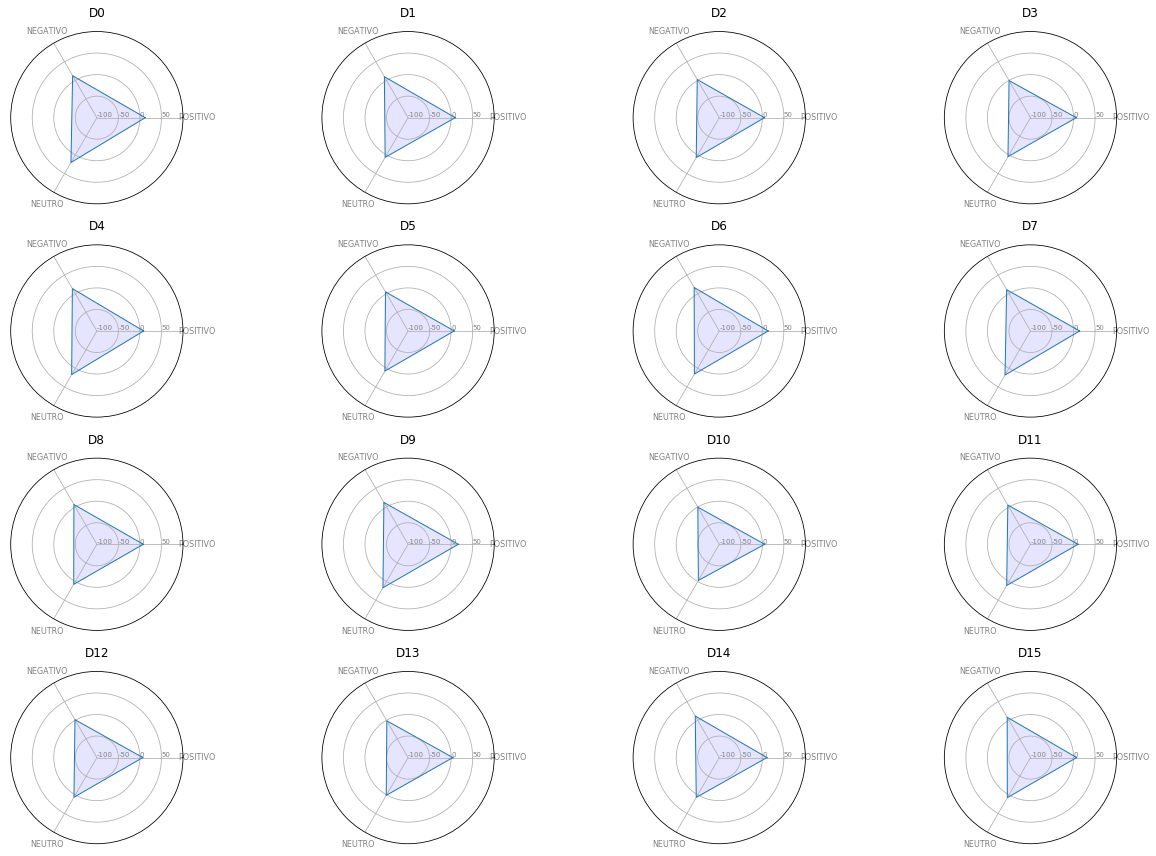

In [11]:
categories = list(df)
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(18, 12))
for m in range(16):
    idx = m + 1
    
    values = df.loc[f'D{m}'].values
    values = np.append(values, values[0])
    print(f'D{m} - {original_phrases[m]}')
    # Initialise the spider plot
    ax = plt.subplot(4, 4, idx, polar=True)
    # Title
    plt.title(f'D{m}')
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(range(-100, 100, 50), [f'{i}' for i in range(-100, 100, 50)], color="grey", size=7)
    plt.ylim(-100, 100)
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

plt.tight_layout()
plt.show()

In [12]:
for i, frase in enumerate(original_phrases[:25]):
    print('-' * 20)
    print(f'D{i} - {frase}')
    print(df.loc[f'D{i}'])

--------------------
D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

POSITIVO    12.42
NEGATIVO    12.42
NEUTRO      20.22
Name: D0, dtype: float64
--------------------
D1 - "A religiao é o que impede o pobre de matar o rico.

POSITIVO    9.57
NEGATIVO    9.85
NEUTRO      6.34
Name: D1, dtype: float64
--------------------
D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

POSITIVO    4.99
NEGATIVO    2.22
NEUTRO      6.96
Name: D2, dtype: float64
--------------------
D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

POSITIVO    6.32
NEGATIVO   -0.60
NEUTRO      4.47
Name: D3, dtype: float64
--------------------
D4 - 30 de Janeiro de 1933 será lembrado como o dia em que o povo se tornou novamente o dono desta nação.

POSITIVO     8.58
NEGATIVO    13.63
NEUTRO      16.99
Name: D4, dtype: float64
--------------------
D5 - A adolescência é como uma c

## Validação 

Validaremos o algoritmo em uma base de 40000 tweets coletados. Dessa base de 40000, serão utilizados apenas 2000 pela grande quantidade de dados e a limitação de hardware que possuímos, os dados serão categorizados em POSITIVO, NEGATIVO e NEUTRO.

In [13]:
original_tweets = []
sents = []
filename = '/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/tweets-tratados-polaridade-10-10-2018.csv'
with open(filename, 'r') as h:
    reader = csv.reader(h, delimiter='|')
    for row in reader:
        tweet = row[1].strip()
        tweet_sent = row[2]
        if len(tweet) > 5:
            original_tweets += [tweet]
            sents += [tweet_sent]        

print('Starting NLP clean up...')
tweets = [tokenizer(tweet) for tweet in original_tweets[:2000]]
ltweets = [f'D{i}' for i in range(len(tweets))]

Starting NLP clean up...


In [14]:
print(original_tweets[:10])
print(tweets[:10])

['WildCat, o robot de quatro patas que corre a 25km/hora -', 'Parem de olhar para o meu telemovel quando estou a tweetar :)', '@scrismelo Porque ainda não acordaste?!', '@TejoPaulo boa opção!', 'RT @joaomhenrique: O corte nas pensões de sobrevivência é um incentivo às viúvas para que saiam da sua zona de conforto e arranjem um novo …', '@catie_mpc AI DEUS. VOU JA PÔR AQUILO. f-se, um Louis português é o meu fucking sonho', '@joao_paquete fica com a tua opinião ahah', '@soutaosocial tens os links?', 'Nunca podia ser vegetariano, este cheiro a churrasco está a torturar-me lentamente....', 'RT @danielolivalx: E agora, a TSU das viúvas']
['wildcat robot quatr pat corr hor', 'par olhar telemovel twet', 'scrismel porqu aind nã acord', 'tejopaul boa opçã', 'joaomhenriqu cort pensõ sobrevivent incent viúv sai zon confort arranj nov', 'cati mpc deus vou pôr lou português fucking sonh', 'joa paquet fic opiniã ahah', 'soutaosocial tens links', 'nunc pod ser vegetarian cheir churrasc tortur lent',

In [15]:
print('Starting EmotionalLSA model...')
model = EmotionalLSA(use_tfidf=True, debug=True)
print('fit and transform...')
predicted = model.fit_transform(tweets, copy.deepcopy(emotion_words_n))

Starting EmotionalLSA model...
fit and transform...
using Tf-Idf...
Actual number of features: 3990
--- 0.06368708610534668 seconds ---
Calculating SVD...
--- 0.38883304595947266 seconds ---
Processing emotional state...
--- 0.8468184471130371 seconds ---
Generating emotional state from lexicon... this may take a while...
--- 2.148338794708252 seconds ---
Calculating final emotional matrix...
--- 1.0697028636932373 seconds ---


In [16]:
df = pd.DataFrame(predicted, index=ltweets, columns=emotion_words_n.keys())

### Acurácia

Como essa base já esta categorizada, será validada a acurácia do algoritmo implementado, verificando o resultado obtido e comparado com a categoria da frase.

In [17]:
accuracy = 0
change_sent = [('POSITIVE', 'POSITIVO'), ('NEGATIVE', 'NEGATIVO'), ('NEUTRAL', 'NEUTRO')]
for i, frase in enumerate(tweets):
    for org, new in change_sent:
        sentimento_original = sents[i].upper()
        if sentimento_original == org:
            sentimento_original = new
            break
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    if sentimento_original == calculado:
        accuracy += 1
accuracy = np.round((accuracy / len(tweets)) * 100)
print(f'Accuracy: {accuracy}%')

Accuracy: 38.0%


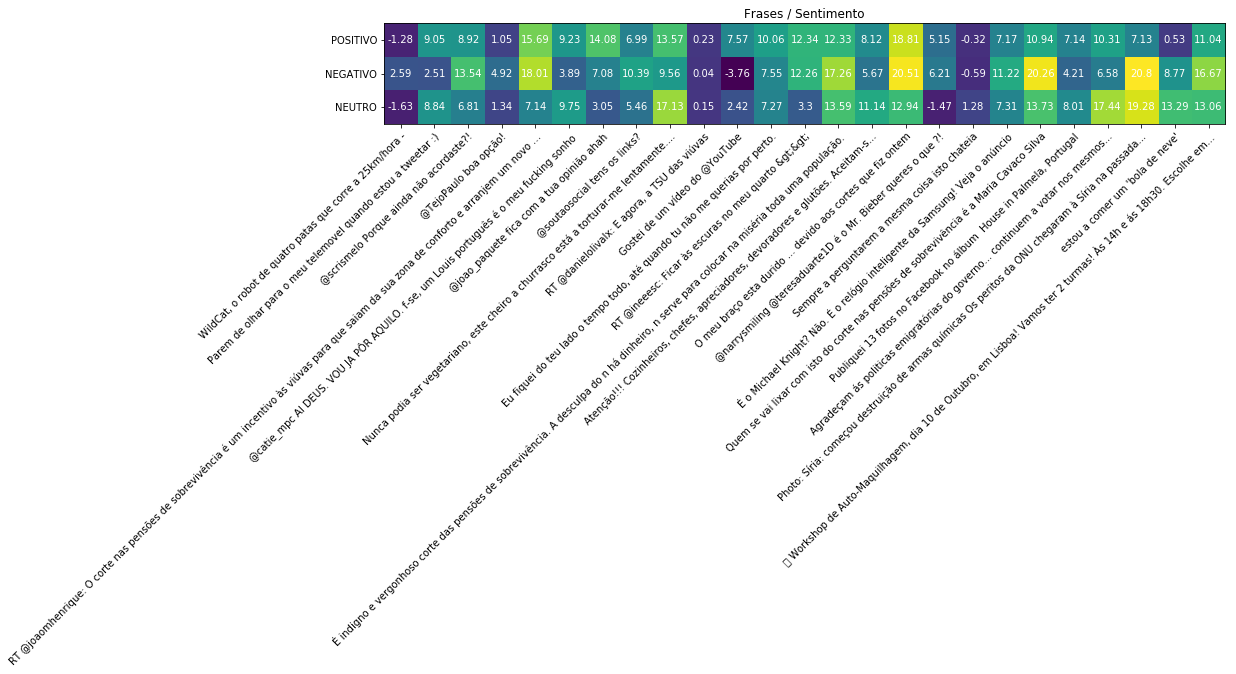

In [19]:
N = 25

categories = list(df)
k_phrases = original_tweets[:N] # [f'D{i}' for i in range(len(original_phrases[:N]))]
values = df[:N].values.T

fig, ax = plt.subplots(1, 1, figsize=(17, 17))
im = ax.imshow(values)

# We want to show all ticks...
ax.set_xticks(np.arange(len(k_phrases)))
ax.set_yticks(np.arange(len(categories)))
# ... and label them with the respective list entries
ax.set_xticklabels(k_phrases)
ax.set_yticklabels(categories)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for j in range(len(categories)):
    for i in range(len(k_phrases)):
        text = ax.text(i, j, values[j, i],
                       ha="center", va="center", color="w")

ax.set_title("Frases / Sentimento")
fig.tight_layout()
plt.show()

In [20]:
for i, frase in enumerate(original_tweets[:25]):
    print('-' * 20)
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    print(f'D{i} - {frase}')
    print(f'ORIGINAL : {sents[i].upper()}')
    print(f'CALCULADO : {calculado}')
    print(df.loc[f'D{i}'])

--------------------
D0 - WildCat, o robot de quatro patas que corre a 25km/hora -
ORIGINAL : NEUTRAL
CALCULADO : NEGATIVO
POSITIVO   -1.28
NEGATIVO    2.59
NEUTRO     -1.63
Name: D0, dtype: float64
--------------------
D1 - Parem de olhar para o meu telemovel quando estou a tweetar :)
ORIGINAL : POSITIVE
CALCULADO : POSITIVO
POSITIVO    9.05
NEGATIVO    2.51
NEUTRO      8.84
Name: D1, dtype: float64
--------------------
D2 - @scrismelo Porque ainda não acordaste?!
ORIGINAL : NEUTRAL
CALCULADO : NEGATIVO
POSITIVO     8.92
NEGATIVO    13.54
NEUTRO       6.81
Name: D2, dtype: float64
--------------------
D3 - @TejoPaulo boa opção!
ORIGINAL : NEUTRAL
CALCULADO : NEGATIVO
POSITIVO    1.05
NEGATIVO    4.92
NEUTRO      1.34
Name: D3, dtype: float64
--------------------
D4 - RT @joaomhenrique: O corte nas pensões de sobrevivência é um incentivo às viúvas para que saiam da sua zona de conforto e arranjem um novo …
ORIGINAL : NEUTRAL
CALCULADO : NEGATIVO
POSITIVO    15.69
NEGATIVO    18.01
NEUT

### Validação 4

Nesta validação, será utilizado outro conjunto de tweets já previamente categorizados, também com valência POSITIVO, NEGATIVO e NEUTRO.

In [21]:
original_tweets = []
sents = []
filename = '/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/tweets_mg2.csv'
with open(filename, 'r') as h:
    reader = csv.reader(h, delimiter='|')
    for row in reader:
        tweet = row[2].strip()
        tweet_sent = row[9]
        tweet = tokenizer(tweet)
        if len(tweet) > 5:
            original_tweets.append(tweet)
            sents.append(tweet_sent)

In [22]:
print('Starting NLP clean up...')
tweets = [tokenizer(tweet) for tweet in original_tweets[:2000]]
ltweets = [f'D{i}' for i in range(len(tweets))]

Starting NLP clean up...


In [23]:
print('Starting EmotionalLSA model...')
model = EmotionalLSA(use_tfidf=True, debug=True)
print('fit and transform...')
predicted = model.fit_transform(tweets, emotion_words_n)

Starting EmotionalLSA model...
fit and transform...
using Tf-Idf...
Actual number of features: 4938
--- 0.06925845146179199 seconds ---
Calculating SVD...
--- 0.40950846672058105 seconds ---
Processing emotional state...
--- 1.0437569618225098 seconds ---
Generating emotional state from lexicon... this may take a while...
--- 2.155452013015747 seconds ---
Calculating final emotional matrix...
--- 1.080667495727539 seconds ---


In [24]:
df = pd.DataFrame(predicted, index=ltweets, columns=emotion_words_n.keys())

In [25]:
accuracy = 0
for i, frase in enumerate(tweets):
    sentimento_original = sents[i].upper()
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    if sentimento_original == calculado:
        accuracy += 1
accuracy = np.round((accuracy / len(tweets)) * 100, 2)
print(f'Accuracy: {accuracy}%')

Accuracy: 38.95%


In [26]:
for i, frase in enumerate(original_tweets[:25]):
    print('-' * 20)
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    print(f'D{i} - {frase}')
    print(f'ORIGINAL : {sents[i].upper()}')
    print(f'CALCULADO : {calculado}')
    print(df.loc[f'D{i}'])

--------------------
D0 - ��� catedral sant antôni govern valad htps jsbkamiquj
ORIGINAL : NEUTRO
CALCULADO : NEGATIVO
POSITIVO    0.53
NEGATIVO    8.16
NEUTRO      1.19
Name: D0, dtype: float64
--------------------
D1 - govern valad min ger htps bthidjcsf
ORIGINAL : NEUTRO
CALCULADO : NEUTRO
POSITIVO    4.10
NEGATIVO    2.39
NEUTRO      5.86
Name: D1, dtype: float64
--------------------
D2 - govern valad min ger htps dpkgzvrqw
ORIGINAL : NEUTRO
CALCULADO : NEUTRO
POSITIVO    4.10
NEGATIVO    2.39
NEUTRO      5.86
Name: D2, dtype: float64
--------------------
D3 - ��� htps bndsoqk
ORIGINAL : NEUTRO
CALCULADO : NEUTRO
POSITIVO   -2.36
NEGATIVO   -1.40
NEUTRO      2.74
Name: D3, dtype: float64
--------------------
D4 - ��� psol vai question aument vereador prefeit justic polit estad min htps dmgbgsek
ORIGINAL : NEGATIVO
CALCULADO : NEGATIVO
POSITIVO    13.49
NEGATIVO    13.76
NEUTRO       9.53
Name: D4, dtype: float64
--------------------
D5 - bom band mort deput cab júli conden fic inel

## Validação 5

Nesta validação, será utilizado um dataset taggeado manualmente pelo Edgar e Rodolfo (eu)... Este dataset contém apenas 50 itens balanceados entre POSITIVO, NEGATIVO e NEUTRO.

In [33]:
original_tweets = []
sents1 = []
sents2 = []
filename = '/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/50_tweets_mg.csv'
with codecs.open(filename, encoding="utf-8") as h:
    reader = csv.reader(h, delimiter='|')
    for row in reader:
        tweet = row[1].strip()
        tweet_sent1 = row[2].upper()
        tweet_sent2 = row[3].upper()
        if len(tweet) > 5:
            original_tweets += [tweet]
            sents1 += [tweet_sent1]
            sents2 += [tweet_sent2]

print('Starting NLP clean up...')
tweets = generate_corpus(original_tweets)
ltweets = [f'D{i}' for i in range(len(tweets))]

Starting NLP clean up...


In [34]:
inter_ltweets = [f'D{i}' for i in range(len(tweets))]
print('Starting EmotionalLSA model...')
model = EmotionalLSA(use_tfidf=True, debug=False)
print('fit and transform...')
predicted = model.fit_transform(tweets, copy.deepcopy(emotion_words_n))
df = pd.DataFrame(predicted, index=inter_ltweets, columns=emotion_words_n.keys())

accuracy1 = 0
accuracy2 = 0
for i, frase in enumerate(tweets):
    sentimento_original1 = sents1[i]
    sentimento_original2 = sents2[i]
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    if sentimento_original1 == calculado:
        accuracy1 += 1
    if sentimento_original2 == calculado:
        accuracy2 += 1
accuracy1 = np.round((accuracy1 / len(tweets)) * 100, 2)
accuracy2 = np.round((accuracy2 / len(tweets)) * 100, 2)
print(f'Accuracy 1: {accuracy1}%')
print(f'Accuracy 2: {accuracy2}%')

Starting EmotionalLSA model...
fit and transform...
Accuracy 1: 46.0%
Accuracy 2: 42.0%


In [35]:
inter_ltweets = [f'D{i}' for i in range(len(tweets))]
print('Starting EmotionalLSA model...')
model = EmotionalLSA(use_tfidf=False, debug=False)
print('fit and transform...')
predicted = model.fit_transform(tweets, copy.deepcopy(emotion_words_n))
df = pd.DataFrame(predicted, index=inter_ltweets, columns=emotion_words_n.keys())

accuracy1 = 0
accuracy2 = 0
for i, frase in enumerate(tweets):
    sentimento_original1 = sents1[i]
    sentimento_original2 = sents2[i]
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    if sentimento_original1 == calculado:
        accuracy1 += 1
    if sentimento_original2 == calculado:
        accuracy2 += 1
accuracy1 = np.round((accuracy1 / len(tweets)) * 100, 2)
accuracy2 = np.round((accuracy2 / len(tweets)) * 100, 2)
print(f'Accuracy 1: {accuracy1}%')
print(f'Accuracy 2: {accuracy2}%')

Starting EmotionalLSA model...
fit and transform...
Accuracy 1: 52.0%
Accuracy 2: 48.0%


## Validação Dataset PUC-PR

Fornecido pela equipe da PUC-PR através do site [EMOÇÕES.BR](http://www.ppgia.pucpr.br/~paraiso/mineracaodeemocoes/index.php), contém cerca de 1000 frases, categorizadas usando as 6 emoções de Ekman (alegria, surpresa, tristeza, medo, raiva, desgosto).

In [3]:
def carregar(filename):
    frases = []
    with open(filename, 'r') as h:
        reader = csv.reader(h, delimiter='|')
        for row in reader:
            frase = tokenizer(row[0]).strip()
            sentimento = row[1].upper()
            if len(frase) > 5:
                frases.append((sentimento, frase))
    return frases

frases = carregar('/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/puc-pr/g1_v1.csv')
shuffle(frases)

phrases = []
for sentimento, frase in frases:
    phrases.append(frase)

print(phrases[:5])

['videogam entram medicin trat depressã tetrapleg jog ajud trein organ funcion corret result mais ráp pacient sent men dor', 'treinador romen perd guard ursos cri cas moln mirc cuid três ursos desd pequen falt document anim lev reserv', 'estud revel mor invern tubarõ elef criatur migr regiõ tropic fug fri achad surprendent obtid ajud satélit', 'câm segur flagr assalt funerár açã acompanh funcionári outr loj políc acion prend assalt men minut', 'fiat dev atac merc nort american cinquecent especial coment expansã montador italian eua desafi tecnológ fiat chrysler reduz emissõ']


In [4]:
inter_lphrases = [f'D{i}' for i in range(len(phrases))]
print('Starting EmotionalLSA model...')
model = EmotionalLSA(use_tfidf=True, debug=True)
print('fit and transform...')
predicted = model.fit_transform(phrases, copy.deepcopy(emotion_words))
df = pd.DataFrame(predicted, index=inter_lphrases, columns=emotion_words.keys())

Starting EmotionalLSA model...
fit and transform...
using Tf-Idf...
Actual number of features: 4280
--- 0.057474613189697266 seconds ---
Calculating SVD...
--- 0.23828434944152832 seconds ---
Processing emotional state...
--- 0.08352065086364746 seconds ---
Generating emotional state from lexicon... this may take a while...
--- 0.27986812591552734 seconds ---
Calculating final emotional matrix...
--- 1.0069389343261719 seconds ---


In [6]:
accuracy = 0
missed = 0
for i, frase in enumerate(phrases):
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    if calculado == frases[i][0]:
        accuracy += 1
    else:
        missed += 1
accuracy = np.round((accuracy / len(phrases)) * 100, 2)
missed = np.round((missed / len(phrases)) * 100, 2)
print(f'Accuracy: {accuracy}%')
print(f'Missed: {missed}%')

Accuracy: 21.36%
Missed: 78.64%
